## Overview

In this guide, we will show how to generate novel images based on a text prompt using
the KerasCV implementation of [stability.ai](https://stability.ai/)'s text-to-image model,
[Stable Diffusion](https://github.com/CompVis/stable-diffusion).

Stable Diffusion is a powerful, open-source text-to-image generation model.  While there
exist multiple open-source implementations that allow you to easily create images from
textual prompts, KerasCV's offers a few distinct advantages.
These include [XLA compilation](https://www.tensorflow.org/xla) and
[mixed precision](https://www.tensorflow.org/guide/mixed_precision) support,
which together achieve state-of-the-art generation speed.

In this guide, we will explore KerasCV's Stable Diffusion implementation, show how to use
these powerful performance boosts, and explore the performance benefits
that they offer.

To get started, let's install a few dependencies and sort out some imports:

In [ ]:
%pip install tensorflow keras_cv --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
%pip install numpy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 69s 346ms/step


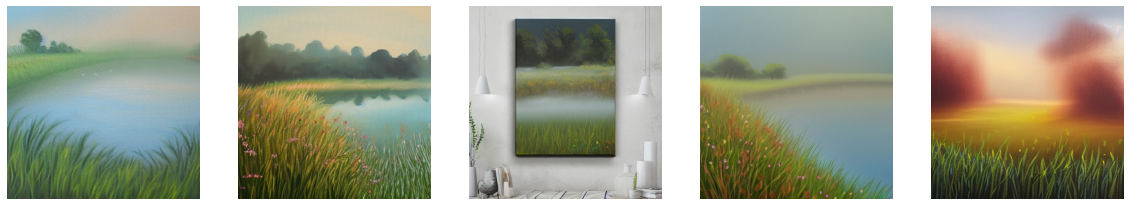

In [ ]:
keras.mixed_precision.set_global_policy("float32")
model = keras_cv.models.StableDiffusion(jit_compile=True, img_width=512, img_height=512)


images = model.text_to_image(
    "a acrylic oil painting of a landscape of a misty morning on the riverside with grass and wildflowers, on a textured canvas ",
    batch_size=5,
)
plot_images(images)


In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

keras.mixed_precision.set_global_policy("float16")
model = keras_cv.models.StableDiffusion(jit_compile=True, img_width=512, img_height=512)

# Example prompt information for each image
prompts = ["a oil painting of a landscape of a misty morning on the riverside with grass and wildflowers, on a textured canvas"]

# Create empty list to store prompt information
prompt_info = []

# Create folder for image files
if not os.path.exists('new_images'):
    os.makedirs('new_images')

# Loop over prompts to generate and save each image
for i, prompt in enumerate(prompts):
    # Run diffusion model to generate image
    images = model.text_to_image(prompt, batch_size=5)
    
    # Loop over batch dimension to save each image
    for j, image_data in enumerate(images):
        # Convert NumPy array to PIL Image
        image = Image.fromarray(np.uint8(np.squeeze(image_data)))
        
        # Save image file with prompt information in the file name
        file_name = f'image_{i}_{j}.jpg'
        file_path = os.path.join('new_images', file_name)
        image.save(file_path)

        # Append prompt information to list
        prompt_info.append({'image_file': file_path, 'prompt': prompt})

# Convert prompt information to Pandas DataFrame and save as CSV file
df = pd.DataFrame(prompt_info)
df.to_csv('image_prompt_info.csv', index=False)


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 66s 199ms/step
